In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-dataset/loan_approval_dataset.json


In [2]:
df = pd.read_json('/kaggle/input/loan-approval-dataset/loan_approval_dataset.json')

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# **Understanding dataset and doing basic analysis**

In [4]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**Checking for duplicate rows, if any**

In [5]:
duplicate_rows = df[df.duplicated()]


In [6]:
duplicate_rows

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


**Dropping 'Id' column as it hold no relevance in our analysis**

In [7]:
df.drop(columns ='Id',inplace=True)

In [8]:
df.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**Understanding data types of each column**

In [9]:
df.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [10]:
df.shape

(252000, 12)

In [11]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [12]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

**Since Uttar_pradesh & Uttar_Pradesh[5] is coming twice, replace it with Uttar_Pradesh**

In [13]:
df['STATE'] = df['STATE'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

df['STATE'].unique()


array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

# Explanatory Data Analysis (EDA)

**Find average State wise defaults**

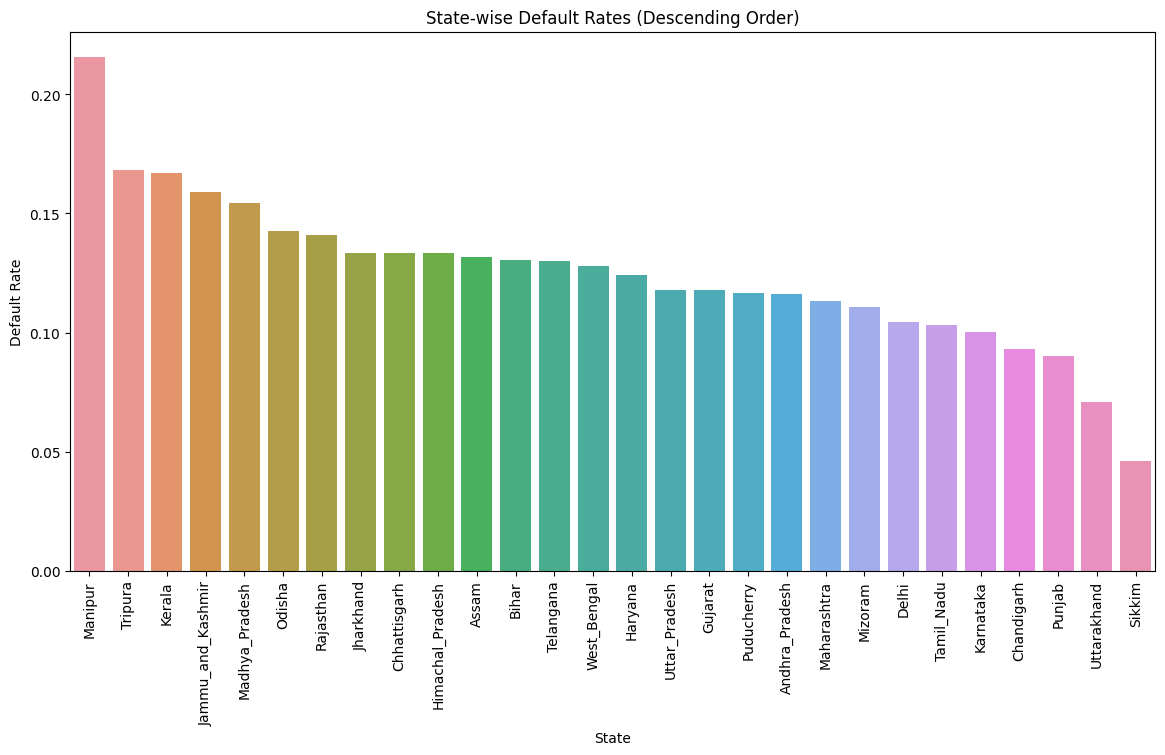

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

state_default = df.groupby('STATE')['Risk_Flag'].mean().reset_index()

# Sort by default rate in descending order
state_default = state_default.sort_values(by='Risk_Flag', ascending=False)

# Bar plot for state-wise default rates
plt.figure(figsize=(14, 7))
sns.barplot(x='STATE', y='Risk_Flag', data=state_default)
plt.xticks(rotation=90)
plt.title('State-wise Default Rates (Descending Order)')
plt.xlabel('State')
plt.ylabel('Default Rate')
plt.show()


**Bank should implement stringent risk management policy and ensure better screening of loans where default rate is high**

# Feature selection using Random Forest Classifier

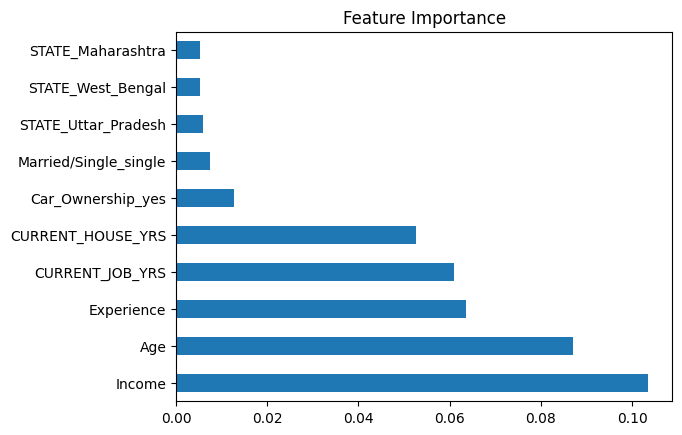

In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']
X = pd.get_dummies(X, drop_first=True)

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

**The above given top 10 features are contributing to risky flags**

**Selecting non-numerical columns and applying one-hot encoding to convert them into numerical form for our analysis**

In [16]:
object_cols = df.select_dtypes(include=['object'])

In [17]:
object_cols_encoded = pd.get_dummies(object_cols)

**Concating the one-hot encoded columns in original dataframe**

In [18]:
df_encoded = pd.concat([df.drop(columns=object_cols.columns), object_cols_encoded], axis=1)


In [19]:
df  = df_encoded

In [20]:
df.head(5)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,3,13,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,9,13,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,4,10,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,2,12,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,3,14,1,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


# Modelling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import numpy as np
import pandas as pd


# Evaluation function
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define and fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on both the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Evaluate performance on the training set
print("Logistic Regression Performance (Training Set):")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate performance on the testing set
print("\nLogistic Regression Performance (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Logistic Regression Performance (Training Set):
Accuracy: 0.8773
Classification Report (Training):


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    176857
           1       0.00      0.00      0.00     24743

    accuracy                           0.88    201600
   macro avg       0.44      0.50      0.47    201600
weighted avg       0.77      0.88      0.82    201600

Confusion Matrix (Training):
[[176857      0]
 [ 24743      0]]

Logistic Regression Performance (Test Set):
Accuracy: 0.8759
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400

Confusion Matrix (Test):
[[44147     0]
 [ 6253     0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

# Random Forest Classifier with 10 Features

**To save the compuational time and resource,restrict the model to top 10 features in case of random forest and XGB**

In [23]:
# Fit a Random Forest model to determine feature importances
initial_rf_model = RandomForestClassifier(random_state=42)
initial_rf_model.fit(X_train, y_train)

# Get feature importances and select top 10 features
feature_importances = pd.Series(initial_rf_model.feature_importances_, index=X.columns)
top_10_features = feature_importances.nlargest(10).index.tolist()

# Reduce the datasets to top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Define and fit the Random Forest Classifier on the reduced dataset (top 10 features)
rf_top10_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_top10_clf.fit(X_train_top10, y_train)

# Make predictions
y_train_pred_top10 = rf_top10_clf.predict(X_train_top10)
y_test_pred_top10 = rf_top10_clf.predict(X_test_top10)

# Evaluate performance
print("Random Forest Classifier with Top 10 Features Performance:")

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_top10):.4f}")
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred_top10, target_names=["Non-Risky", "Risky"]))

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_top10):.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_top10, target_names=["Non-Risky", "Risky"]))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_top10))


Random Forest Classifier with Top 10 Features Performance:
Training Set Performance:
Accuracy: 0.8774
Classification Report (Training):
              precision    recall  f1-score   support

   Non-Risky       0.88      1.00      0.93    176857
       Risky       0.86      0.00      0.00     24743

    accuracy                           0.88    201600
   macro avg       0.87      0.50      0.47    201600
weighted avg       0.88      0.88      0.82    201600


Test Set Performance:
Accuracy: 0.8760
Classification Report (Test):
              precision    recall  f1-score   support

   Non-Risky       0.88      1.00      0.93     44147
       Risky       0.75      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.81      0.50      0.47     50400
weighted avg       0.86      0.88      0.82     50400

Confusion Matrix (Test):
[[44145     2]
 [ 6247     6]]


# XGBoost with top 10 features

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already defined X_train_top10, y_train, X_test_top10, and y_test
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_top10, y_train)

# Make predictions
y_train_pred_top10 = xgb_model.predict(X_train_top10)
y_test_pred_top10 = xgb_model.predict(X_test_top10)

# Evaluate performance using precision and recall
print("XGBoost with Top 10 Features Performance:")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_top10))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_top10))

# Confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_test_pred_top10)
print("Confusion Matrix:")
print(conf_matrix)


XGBoost with Top 10 Features Performance:
Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94    176857
           1       0.71      0.18      0.29     24743

    accuracy                           0.89    201600
   macro avg       0.80      0.59      0.61    201600
weighted avg       0.87      0.89      0.86    201600

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     44147
           1       0.65      0.16      0.26      6253

    accuracy                           0.89     50400
   macro avg       0.77      0.58      0.60     50400
weighted avg       0.86      0.89      0.85     50400

Confusion Matrix:
[[43588   559]
 [ 5228  1025]]


**To further improve model performance, lets use hyperparameter tuning and ensemble technique**

# Hyperparameter tuning in Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV

# Ensure feature names don't contain special characters
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test.columns]

# Proceed with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_xgb_model = grid_search.best_estimator_
y_test_pred_best = best_xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance after Hyperparameter Tuning:")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_best))



Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
XGBoost Performance after Hyperparameter Tuning:
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     44147
           1       0.66      0.12      0.20      6253

    accuracy                           0.88     50400
   macro avg       0.77      0.55      0.57     50400
weighted avg       0.86      0.88      0.85     50400



# Ensemble Using Random Forest and XGB Classifier

In [26]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with different models
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_test_pred_voting = voting_clf.predict(X_test)

# Evaluate performance
print("Ensemble Voting Classifier Performance:")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_voting))


Ensemble Voting Classifier Performance:
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     44147
           1       0.66      0.22      0.33      6253

    accuracy                           0.89     50400
   macro avg       0.78      0.60      0.64     50400
weighted avg       0.87      0.89      0.86     50400

